# Preparation stuff

## Connect to Drive

In [ ]:
connect_to_drive = False

In [ ]:
#Run command and authorize by popup --> other window
if connect_to_drive:
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)

## Install packages

In [ ]:
if connect_to_drive:
    #Install FS code
    !pip install  --upgrade --no-deps --force-reinstall git+https://github.com/federicosiciliano/easy_lightning.git@fedsic

    !pip install pytorch_lightning

## IMPORTS

In [ ]:
#Put all imports here
import numpy as np
import matplotlib.pyplot as plt
#from copy import deepcopy
#import pickle
import os
import sys
#import cv2
import torch
import csv

## Define paths

In [ ]:
#every path should start from the project folder:
project_folder = "../"
if connect_to_drive:
    project_folder = "/content/gdrive/Shareddrives/<SharedDriveName>" #Name of SharedDrive folder
    #project_folder = "/content/gdrive/MyDrive/<MyDriveName>" #Name of MyDrive folder

#Config folder should contain hyperparameters configurations
cfg_folder = os.path.join(project_folder,"cfg")

#Data folder should contain raw and preprocessed data
data_folder = os.path.join(project_folder,"data")
raw_data_folder = os.path.join(data_folder,"raw")
processed_data_folder = os.path.join(data_folder,"processed")

#Source folder should contain all the (essential) source code
source_folder = os.path.join(project_folder,"src")

#The out folder should contain all outputs: models, results, plots, etc.
out_folder = os.path.join(project_folder,"out")
img_folder = os.path.join(out_folder,"img")

## Import own code

## RESULTS

In [ ]:
# recursive flattening of a dictionary useful to access each experiment's config easier

def flatten_dict(d, parent_key='', sep='.'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [ ]:
exp_names = ["prova"] 
flatten_cfg = True

In [ ]:
# Load experiments configurations

experiments = {}
for exp_name in exp_names:
    experiments[exp_name] = easy_exp.exp.get_experiments(name = exp_name, project_folder = project_folder)
    
    if flatten_cfg:
        for exp_id, exp_cfg in experiments[exp_name].items():
            experiments[exp_name][exp_id] = flatten_dict(exp_cfg)

In [ ]:
# Load experiments outputs (performances metrics)

experiments_logs = {}
for exp_name in exp_names:
    experiments_logs[exp_name] = {}
    for exp_id in experiments[exp_name].keys():
        experiments_logs[exp_name][exp_id] = easy_torch.process.load_logs(name = exp_name, exp_id = exp_id, project_folder = project_folder)

In [ ]:
#print(experiments['prova']['puij3iOGJtt3NrHz']['model.useSVD'])

print(experiments['prova'].keys())

dict_keys(['esC9kcVhMiHmyzy5', 'kwGAQuBJ1DvlUo2N', 'w9Jbvo4TbGl2nHrV', 'AnB1RXNmeCMyzb9r', 'BwFfJcgd2MhIC7r9', '8xFFaE3bGnTpxfel', '0bsqK5XtTDMqrG41', 'RkiTUj63oQg3DDUz', 'j4Wc8zbe93ZGcnd5', 'ALg4w1UsazUOzp0g', 'wmfGxUGfjbTJwQfy', '7lQTBBJvtGJH6gKX', 'gQ9wSciZPrMNjeWI', 'rvjRdc5iNE6RW2xk', 'nDqVZlUvpTLSJ723'])


In [ ]:
print(experiments['prova'].items())

dict_items([('esC9kcVhMiHmyzy5', {'data_params.data_folder': '../data\\raw', 'data_params.dataset_params.lookback': 200, 'data_params.dataset_params.lookforward': 1, 'data_params.dataset_params.out_seq_len.test': 1, 'data_params.dataset_params.out_seq_len.train': None, 'data_params.dataset_params.out_seq_len.val': 1, 'data_params.dataset_params.padding_value': 0, 'data_params.dataset_params.sequential_keys': ['sid', 'timestamp', 'rating'], 'data_params.dataset_params.simultaneous_lookforward': 1, 'data_params.dataset_params.stride': None, 'data_params.densify_index': True, 'data_params.min_items_per_user': 5, 'data_params.min_rating': 0, 'data_params.min_users_per_item': 5, 'data_params.name': 'ml-1m', 'data_params.split_method': 'leave_n_out', 'data_params.test_sizes': [1, 1, 0], 'model.emission_tracker.log_level': 'critical', 'model.emission_tracker.output_dir': '../out/log/prova/', 'model.emission_tracker.tracking_mode': 'process', 'model.freeze_emb': False, 'model.loader_params.bat

dict_keys(['esC9kcVhMiHmyzy5', 'kwGAQuBJ1DvlUo2N', 'w9Jbvo4TbGl2nHrV', 'AnB1RXNmeCMyzb9r', 'BwFfJcgd2MhIC7r9'])
dict_keys(['8xFFaE3bGnTpxfel', '0bsqK5XtTDMqrG41', 'RkiTUj63oQg3DDUz', 'j4Wc8zbe93ZGcnd5', 'ALg4w1UsazUOzp0g'])
dict_keys(['wmfGxUGfjbTJwQfy', '7lQTBBJvtGJH6gKX', 'gQ9wSciZPrMNjeWI', 'rvjRdc5iNE6RW2xk', 'nDqVZlUvpTLSJ723'])
[4, 8, 16, 32, 64]
[0.6620699167251587, 0.6412224769592285, 0.6064390540122986, 0.5826326012611389, 0.5849082469940186]
[0.5565117001533508, 0.5561503171920776, 0.5505121350288391, 0.5498743057250977, 0.5382391810417175]
[0.6930298805236816, 0.6929650902748108, 0.6935470104217529, 0.6948368549346924, 0.6986677646636963]
[0.66206992 0.64122248 0.60643905 0.5826326  0.58490825]
[0.5565117  0.55615032 0.55051214 0.54987431 0.53823918]
[0.69302988 0.69296509 0.69354701 0.69483685 0.69866776]


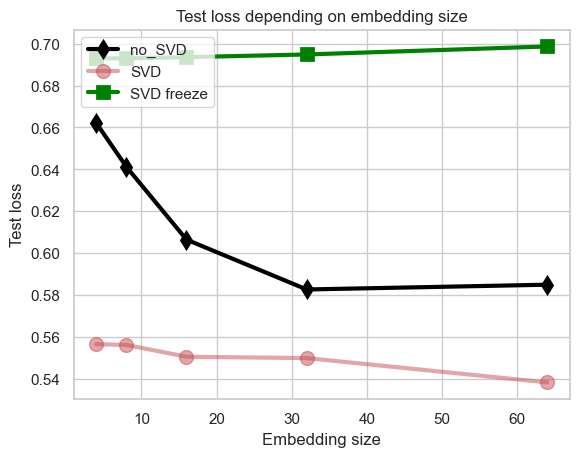

In [ ]:
# PLOT to fix

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_theme(style="whitegrid")

no_svd_experiments = {k: v for k, v in experiments['prova'].items() if experiments['prova'][k]['model.useSVD'] == False}
svd_experiments = {k: v for k, v in experiments['prova'].items() if (experiments['prova'][k]['model.useSVD'] == True and experiments['prova'][k]['model.freeze_emb'] == False)}
svd_freeze_experiments = {k: v for k, v in experiments['prova'].items() if (experiments['prova'][k]['model.useSVD'] == True and experiments['prova'][k]['model.freeze_emb'] == True)}

print(no_svd_experiments.keys())
print(svd_experiments.keys())
print(svd_freeze_experiments.keys())

x_values = []
no_svd_loss = []
svd_loss = []
svd_freeze_loss = []

for exp_id1 in no_svd_experiments.keys():
   for exp_id2 in svd_experiments.keys():
      for exp_id3 in svd_freeze_experiments.keys():
         if (no_svd_experiments[exp_id1]['model.rec_model.emb_size'] == svd_experiments[exp_id2]['model.rec_model.emb_size'] and no_svd_experiments[exp_id1]['model.rec_model.emb_size'] == svd_freeze_experiments[exp_id3]['model.rec_model.emb_size']):
            x_values.append(experiments['prova'][exp_id1]['model.rec_model.emb_size'])
            no_svd_loss.append(experiments_logs['prova'][exp_id1]['test_loss'].iloc[-1])
            svd_loss.append(experiments_logs['prova'][exp_id2]['test_loss'].iloc[-1])
            svd_freeze_loss.append(experiments_logs['prova'][exp_id3]['test_loss'].iloc[-1])


print(x_values)
x_sorted = np.array(x_values)
no_svd_loss_sorted = np.array(no_svd_loss)
svd_loss_sorted = np.array(svd_loss)
svd_freeze_loss_sorted = np.array(svd_freeze_loss)

sort_indices = np.argsort(x_sorted)

print(no_svd_loss)
print(svd_loss)
print(svd_freeze_loss)

x_sorted = x_sorted[sort_indices]
no_svd_loss_sorted = no_svd_loss_sorted[sort_indices]
svd_loss_sorted = svd_loss_sorted[sort_indices]
svd_freeze_loss_sorted = svd_freeze_loss_sorted[sort_indices]

print(no_svd_loss_sorted)
print(svd_loss_sorted)
print(svd_freeze_loss_sorted)

plt.plot(x_sorted, no_svd_loss_sorted, marker='d',c='black',ls='-',lw=3,ms=8,mew=2)
plt.plot(x_sorted, svd_loss_sorted, marker='o', c='r', ls='-', lw=3, ms=10, alpha=.5)
plt.plot(x_sorted, svd_freeze_loss_sorted, marker='s',c='green',ls='-',lw=3,ms=8,mew=2)

plt.xlabel('Embedding size')
plt.ylabel('Test loss')
plt.title('Test loss depending on embedding size')
plt.legend(['no_SVD', 'SVD', 'SVD freeze'],loc='upper left')
plt.show()

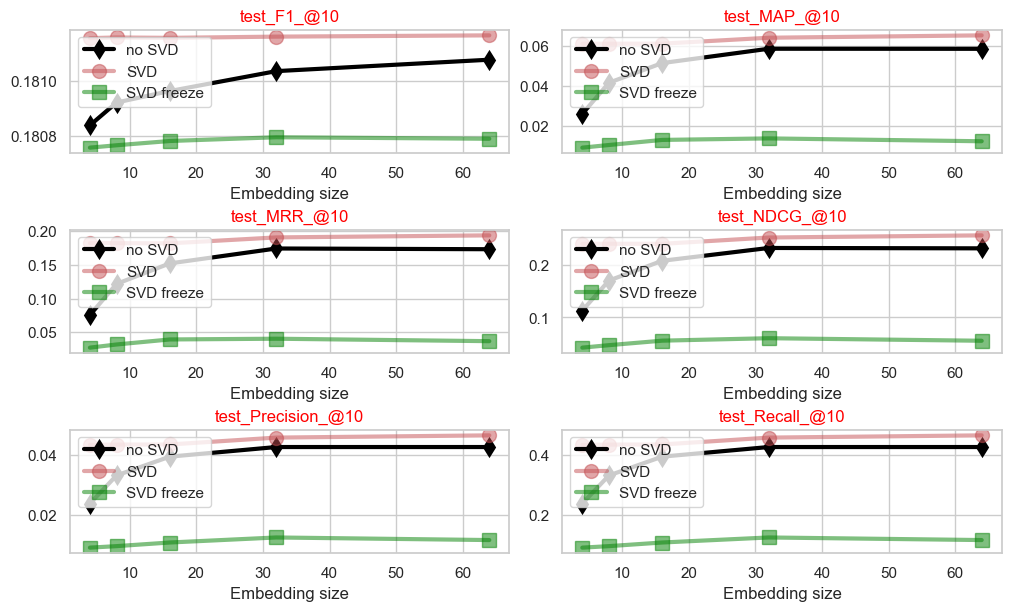

In [ ]:
#multiple plots

metrics_to_plot = ['test_F1_@10',
                   'test_MAP_@10',
                   'test_MRR_@10',
                   'test_NDCG_@10',
                   'test_Precision_@10',
                   'test_Recall_@10']

fig, axs = plt.subplots(3, 2, figsize=(10, 6), layout='constrained')

for ax, metric in zip(axs.flat, metrics_to_plot):
    x_values = []
    no_svd = []
    svd = []
    svd_freeze = []
    for exp_id1 in no_svd_experiments.keys():
        for exp_id2 in svd_experiments.keys():
            for exp_id3 in svd_freeze_experiments.keys():
                if (no_svd_experiments[exp_id1]['model.rec_model.emb_size'] == svd_experiments[exp_id2]['model.rec_model.emb_size'] and no_svd_experiments[exp_id1]['model.rec_model.emb_size'] == svd_freeze_experiments[exp_id3]['model.rec_model.emb_size']):
                    x_values.append(experiments['prova'][exp_id1]['model.rec_model.emb_size'])
                    no_svd.append(experiments_logs['prova'][exp_id1][metric].iloc[-1])
                    svd.append(experiments_logs['prova'][exp_id2][metric].iloc[-1])
                    svd_freeze.append(experiments_logs['prova'][exp_id3][metric].iloc[-1])
    
    x_sorted = np.array(x_values)
    no_svd_sorted = np.array(no_svd)
    svd_sorted = np.array(svd)
    svd_freeze_sorted = np.array(svd_freeze)

    sort_indices = np.argsort(x_sorted)

    x_sorted = x_sorted[sort_indices]
    no_svd_sorted = no_svd_sorted[sort_indices]
    svd_sorted = svd_sorted[sort_indices]
    svd_freeze_sorted = svd_freeze_sorted[sort_indices]

    ax.set_title(f'{metric}', color="red")
    ax.plot(x_sorted, no_svd_sorted, marker='d',c='black',ls='-',lw=3,ms=8,mew=2)
    ax.plot(x_sorted, svd_sorted,  marker='o', c='r', ls='-', lw=3, ms=10, alpha=.5)
    ax.plot(x_sorted, svd_freeze_sorted,  marker='s', c='green', ls='-', lw=3, ms=10, alpha=.5)

    #ax.set_ylim((0, 0.3))
    ax.set_xlabel('Embedding size')
    #ax.set_ylabel(f'{metric}')
    
    ax.legend(['no SVD', 'SVD', 'SVD freeze'],loc='upper left')